In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score, ConfusionMatrixDisplay, balanced_accuracy_score,f1_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sys import platform
if platform == "linux" or platform == "linux2":
    # linux
    path='/home/vedant/projects/'
elif platform == "darwin":
    # OS X
    path='/Users/vedant/Desktop/Programming/'

# labels={0:'clean',1:'high fry',2:'layered',3:'lowfry',4:'midfry',5:'no_vocals'}
labels={0:'clean',1:'scream',2:'no vocal'}

In [2]:
n_class = '3class'

X_train=np.load(f'{path}ScreamDetection/FINAL/working_data_final/{n_class}_x_train-vggish.npy',allow_pickle=True)
X_test=np.load(f'{path}ScreamDetection/FINAL/working_data_final/{n_class}_x_test-vggish.npy',allow_pickle=True)
X_valid=np.load(f'{path}ScreamDetection/FINAL/working_data_final/{n_class}_x_valid-vggish.npy',allow_pickle=True)

y_train_hot=np.load(f'{path}ScreamDetection/FINAL/working_data_final/{n_class}_y_train-vggish.npy',allow_pickle=True)
y_test_hot=np.load(f'{path}ScreamDetection/FINAL/working_data_final/{n_class}_y_test-vggish.npy',allow_pickle=True)
y_valid_hot=np.load(f'{path}ScreamDetection/FINAL/working_data_final/{n_class}_y_valid-vggish.npy',allow_pickle=True)

y_train = np.argmax(y_train_hot,axis=1)
y_test = np.argmax(y_test_hot,axis=1)
y_valid = np.argmax(y_valid_hot,axis=1)
#df = pd.DataFrame(d,columns=feature_cols)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_valid=scaler.transform(X_valid)

In [3]:
def classwise_accuracy(cm):
    a=np.zeros(cm.shape)
    for i,x in enumerate(cm):
        a[i]=x/sum(x)
    return a

In [4]:
def eval_metrics(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred,average='macro')
    macro_acc = balanced_accuracy_score(y_test,y_pred)
    classwise_acc = classwise_accuracy(cm)
    return(cm,acc,f1,macro_acc,classwise_acc)

# kNN

Overall Accuracy Score: 0.803690036900369
Macro Accuracy: 0.8058120416782698
Class-wise accuracy: 
[[0.87268519 0.08564815 0.04166667]
 [0.19789474 0.73894737 0.06315789]
 [0.05580357 0.13839286 0.80580357]]


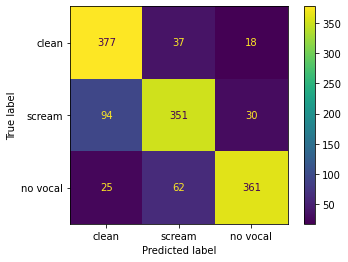

In [5]:
k=4
KNN_model = KNeighborsClassifier(n_neighbors=k)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)

cm,acc,f1,macro_acc,classwise_acc = eval_metrics(y_test,KNN_prediction)

print(f"Overall Accuracy Score: {acc}")
print(f"Macro Accuracy: {macro_acc}")
print(f"Class-wise accuracy: \n{classwise_acc}")
l=labels.values()
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=l).plot()

# SVM

Overall Accuracy Score: 0.8206642066420664
Macro Accuracy: 0.8223112178594635
F1 score: 0.8210993449903922
Class-wise accuracy: 
[[0.84953704 0.11342593 0.03703704]
 [0.16       0.75578947 0.08421053]
 [0.06026786 0.078125   0.86160714]]


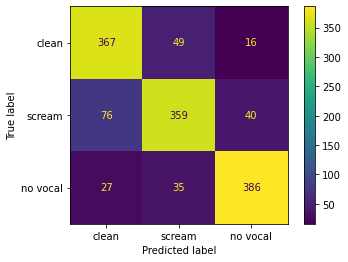

In [7]:
SVM_model = SVC(gamma='scale',C=1.0533, kernel='poly', degree=2,coef0=2.1,random_state=42)
SVM_model.fit(X_train, y_train)

SVM_prediction = SVM_model.predict(X_test)

cm,acc,f1,macro_acc,classwise_acc = eval_metrics(y_test,SVM_prediction)

print(f"Overall Accuracy Score: {acc}")
print(f"Macro Accuracy: {macro_acc}")
print(f"F1 score: {f1}")
print(f"Class-wise accuracy: \n{classwise_acc}")
l=labels.values()
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=l).plot()

In [39]:
cm/cm.sum(axis=1)

array([[0.84953704, 0.10315789, 0.03571429],
       [0.17592593, 0.75578947, 0.08928571],
       [0.0625    , 0.07368421, 0.86160714]])

# RF

Overall Accuracy Score: 0.8191881918819188
Macro Accuracy: 0.8203617260744455
F1 score: 0.8200458870746504
Class-wise accuracy: 
[[0.83564815 0.13657407 0.02777778]
 [0.14315789 0.77052632 0.08631579]
 [0.05580357 0.08928571 0.85491071]]


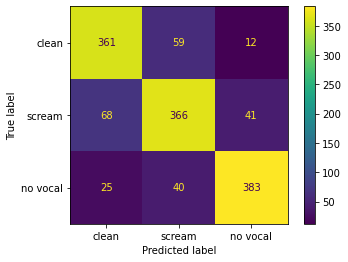

In [36]:
RF_model = RandomForestClassifier(n_estimators=90,criterion='gini',max_depth=None,\
    min_samples_split=2,min_samples_leaf=1,max_features='auto',max_leaf_nodes=None,class_weight='balanced',random_state=42)
RF_model.fit(X_train, y_train)
RF_prediction = RF_model.predict(X_test)

cm,acc,f1,macro_acc,classwise_acc = eval_metrics(y_test,RF_prediction)

print(f"Overall Accuracy Score: {acc}")
print(f"Macro Accuracy: {macro_acc}")
print(f"F1 score: {f1}")
print(f"Class-wise accuracy: \n{classwise_acc}")
l=labels.values()
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=l).plot()

In [37]:
cm/cm.sum(axis=1)

array([[0.83564815, 0.12421053, 0.02678571],
       [0.15740741, 0.77052632, 0.09151786],
       [0.05787037, 0.08421053, 0.85491071]])

In [43]:
import numpy as np
import pandas as pd
classes=np.array(['Sing','Scream','No Vocal'])
# knn_classwise=np.array([0.49152542,0.49152542,0.18145161,0,0.26282051,0.68243243])
rf_classwise = np.array([.8356,.7705,.8549])
svm_classwise = np.array([.8495,.7557,.8616])
# fcnn_classwise = np.array([.6271,.5357,.1935,.0298,.3333,.8108])
# cnn_classwise = np.array([0.8953,0.8127,0.9180])
df=pd.DataFrame()

# df['kNN']=knn_classwise
df['Random Forest'] = rf_classwise
df['SVM'] = svm_classwise
# df['Fully Connected Network'] = fcnn_classwise
# df['CNN'] = cnn_classwise

df=df.T
df.columns=classes
df=df.T

import plotly.graph_objects as go
fig=go.Figure(data=[
        go.Bar(name="RF",
            x=df.index, y=df['Random Forest'],
            text=df['Random Forest'],
            textposition='inside',
            ),
        go.Bar(name="SVM",
            x=df.index, y=df['SVM'],
            text=df['SVM'],
            textposition="inside",
            )
        ])
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.update_layout(
    autosize=True,
    width=300,
    height=200,
    # title={
    #     'text': "Classwise accuracy",
    #     'x':0.5,
    #     'y':0.95,
    #     'xanchor': 'center',
    #     'yanchor': 'top',
    #     },
    font=dict(
        size=10
    ),
    margin=dict(
        l=10,
        r=5,
        b=15,
        t=10,
        pad=0
    ),
    legend=dict(
    orientation="h",
    yanchor="top",
    y=1.2,
    xanchor="center",
    x=0.5

)
    )
fig.update_xaxes(
        tickangle = 0,
        title_text = "",
        title_font = {"size": 1},
        title_standoff = 0)
    
fig.update_yaxes(
        tickangle = 0,
        title_text = "Accuracy",
        # title_font = {"size": 14},
        title_standoff = 5)
# fig.update_layout(legend_title_text='')
fig.update_layout(yaxis= { 'tickformat': ',.0%'})
fig.update_layout(uniformtext_minsize=10)
fig.update_yaxes(range=[0.6,1.0])
fig.write_image("/Users/vedant/Desktop/Programming/ScreamDetection/classwise-accuracies-vggish-200x300.pdf", format="pdf", width=300, height=200, scale=2)
fig

# FCNN

In [15]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import StandardScaler


import plotly.graph_objs as go
from plotly.subplots import make_subplots

import pandas as pd
def train_models(X_train,y_train_hot,X_test,y_test_hot,epochs,batch_size,lr,layer1_nodes,optimiser,loss,verbose,save=False):
    model = Sequential()
    input_shape = (128,1)#(128, 87, 1)
    # model.add(Dense(128, activation='relu'))
    # model.add(Dense(6, activation='softmax'))
    model.add(Dense(layer1_nodes,input_dim=128, activation='relu'))
    # model.add(Dense(32, activation='relu'))
    # model.add(Dense(16, activation='relu'))
    # model.add(Dense(10, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    if optimiser=='adadelta':
        optim=keras.optimizers.Adadelta(learning_rate=lr)
    if optimiser == 'adam':
        optim=keras.optimizers.Adam(learning_rate=lr)

    if loss == 'crossentropy':
        loss_fn = keras.losses.categorical_crossentropy

    model.compile(loss=loss_fn,
                optimizer=optim,
                metrics=['accuracy'])
    model.build(input_shape)
    model.summary()
    # fit the model
    history=model.fit(X_train, y_train_hot,
            batch_size=batch_size,
            epochs=epochs,
            verbose=verbose,
            validation_data=(X_test, y_test_hot))
    training_loss=history.history['loss']
    validation_loss=history.history['val_loss']
    training_acc=history.history['accuracy']
    validation_acc=history.history['val_accuracy']
    df=pd.DataFrame()
    df['training_loss'] = training_loss
    df['validation_loss'] = validation_loss
    df['training_acc'] = training_acc
    df['validation_acc'] = validation_acc
    lr_str=str(lr).replace('.','_')
    model_name=f'fcnn_layer1-{layer1_nodes}_batch-{batch_size}_epochs-{epochs}_lr-{lr_str}'
    if save:
        model.save(f'{path}ScreamDetection/CNN/trained_models/fcnn/{model_name}')
        df.to_csv(f'{path}ScreamDetection/CNN/trained_models/fcnn/{model_name}.csv')

    trace1 = go.Scatter(
    x=df.index,
        y=df['training_loss'],
        name='Training Loss'
    )
    trace2 = go.Scatter(
        x=df.index,
        y=df['validation_loss'],
        name='Validation Loss'
    )
    trace3 = go.Scatter(
        x=df.index,
        y=df['training_acc'],
        name='Training Accuracy',
        yaxis='y2'
    )
    trace4 = go.Scatter(
        x=df.index,
        y=df['validation_acc'],
        name='Validation Accuracy',
        yaxis='y2'
    )

    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.add_trace(trace1)
    fig.add_trace(trace2)
    fig.add_trace(trace3,secondary_y=True)
    fig.add_trace(trace4,secondary_y=True)
    fig.show()
    return model

In [16]:
# X_train = X_train.reshape(-1, 12)
# X_test = X_test.reshape(-1, 12)
# X_valid = X_valid.reshape(-1, 12)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1539      
Total params: 67,587
Trainable params: 67,587
Non-trainable params: 0
_________________________________________________________________


Overall Accuracy Score: 0.8250922509225093
Macro Accuracy: 0.8266742666852317
Class-wise accuracy: 
[[0.8587963  0.1087963  0.03240741]
 [0.15578947 0.76631579 0.07789474]
 [0.05803571 0.08705357 0.85491071]]


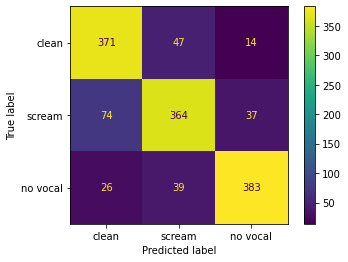

In [17]:
model=train_models(X_train,y_train_hot,X_valid,y_valid_hot,epochs=100,batch_size=1024,lr=0.0001,layer1_nodes=512,optimiser='adam',loss='crossentropy',verbose=0,save=False)
y_pred=model.predict(X_test)
y_pred[np.where(y_pred==np.max(y_pred))] = 1
y_pred=np.argmax(y_pred,axis=1)
cm,acc,f1,macro_acc,classwise_acc = eval_metrics(y_test,y_pred)

print(f"Overall Accuracy Score: {acc}")
print(f"Macro Accuracy: {macro_acc}")
print(f"Class-wise accuracy: \n{classwise_acc}")
l=labels.values()
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=l).plot()